In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import networkx

# Dataset:

- Chosen Dataset => https://snap.stanford.edu/data/p2p-Gnutella06.html

Dataset statistics <br>
Nodes 	8717 <br>
Edges 	31525 <br>
Nodes in largest WCC 	8717 (1.000) <br>
Edges in largest WCC 	31525 (1.000) <br>
Nodes in largest SCC 	3226 (0.370) <br>
Edges in largest SCC 	13589 (0.431) <br>
Average clustering coefficient 	0.0067 <br>
Number of triangles 	1142 <br>
Fraction of closed triangles 	0.002717 <br>
Diameter (longest shortest path) 	10 <br>
90-percentile effective diameter 	5.3 <br>

In [2]:
f = open('p2p-Gnutella06.txt')
lines = f.readlines()
f.close()

In [3]:
for x in lines[:4]:
    print(x)

# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella06.txt 

# Directed Gnutella P2P network from August 6 2002

# Nodes: 8717 Edges: 31525

# FromNodeId	ToNodeId



# Question 1 - [45 Points] Link Analysis

Pick a real-world network dataset (with number of nodes > 100) from here.

[2 points] Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’. <br>
[28 points] Briefly describe the dataset chosen and report the following: <br>

1. Number of Nodes
2. Number of Edges
3. Avg In-degree
4. Avg. Out-Degree
5. Node with Max In-degree
6. Node with Max out-degree
7. The density of the network

<br>Further, perform the following tasks:
1. [5 points] Plot degree distribution of the network (in case of a directed graph, plot in-degree and out-degree separately).
2. [10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution of the network.

#### Adjacency Matrix and Edge List:

In [4]:
V = 8717
E = 31525
graph = [[0 for _ in range(V)] for _ in range(V)] # Adjacency Matrix
ugraph = [[0 for _ in range(V)] for _ in range(V)]
edgeList = [] # Edge List
numNodes = set()
numEdges = 0
for line in lines[4:]:
    [x,y] = line.split("\t")
    graph[int(x)][int(y)] = 1 # Directed graph edge.
    ugraph[int(x)][int(y)] = 1
    ugraph[int(y)][int(x)] = 1
    edgeList.append([int(x), int(y)]) # Add to edge list.
    # Count unique nodes and count edges.
    numNodes.add(int(x))
    numNodes.add(int(y))
    numEdges += 1

#### No. of nodes and Edges:

In [5]:
print("Number of nodes: ", len(numNodes))
print("Number of edges: ", numEdges)

Number of nodes:  8717
Number of edges:  31525


#### Indegress and Outdegress:

In [6]:
indegrees = [0 for _ in range(len(numNodes))]
outdegrees = [0 for _ in range(len(numNodes))]

# Use edge list
for [x,y] in edgeList:
    outdegrees[x] += 1
    indegrees[y] += 1

In [7]:
print("Average Indegree: ", sum(indegrees)/len(indegrees))
print("Average Outdegree: ", sum(outdegrees)/len(outdegrees))
print("Max indegree node: ", np.argmax(indegrees), " -> ", np.max(indegrees))
print("Max outdegree node: ", np.argmax(outdegrees), " -> ", np.max(outdegrees))

Average Indegree:  3.6164965010898245
Average Outdegree:  3.6164965010898245
Max indegree node:  356  ->  64
Max outdegree node:  6494  ->  113


#### Network Density:

- edge present / all possible edges.

In [8]:
print("Network Density: ", numEdges/((len(numNodes) * (len(numNodes) - 1))/2))

Network Density:  0.0008298523407732502


#### Degree Distribution:

- count unique degrees and counts and plot

In [9]:
indegreeDistribution = np.unique(np.array(indegrees), return_counts=True)
outdegreeDistribution = np.unique(np.array(outdegrees), return_counts=True)

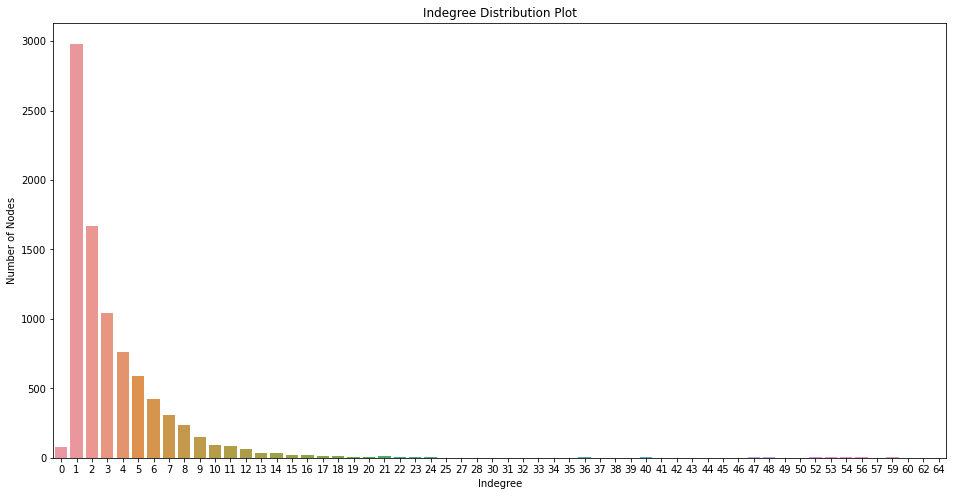

In [10]:
plt.figure(figsize=(16, 8))
sns.barplot(x=indegreeDistribution[0], y=indegreeDistribution[1])
plt.ylabel('Number of Nodes')
plt.xlabel('Indegree')
plt.title("Indegree Distribution Plot")
plt.show()

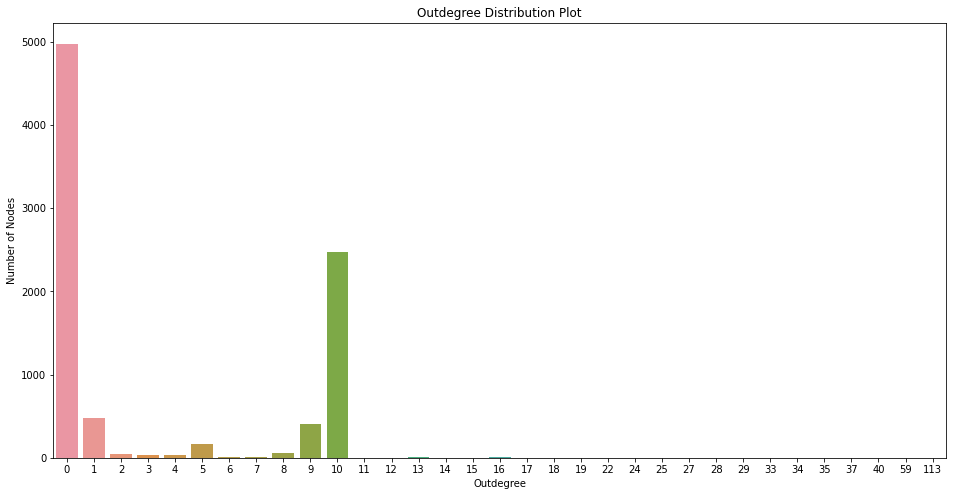

In [11]:
plt.figure(figsize=(16, 8))
sns.barplot(x=outdegreeDistribution[0], y=outdegreeDistribution[1])
plt.ylabel('Number of Nodes')
plt.xlabel('Outdegree')
plt.title("Outdegree Distribution Plot")
plt.show()

#### Clustering Coefficient of each Node:

- Neighbourhood connectivity Nv / All possible neighbourhood connections.
- https://en.wikipedia.org/wiki/Clustering_coefficient
- for directed graph, i have used outgoing edges as criteria to determine if 'a' is in neighbourhood of 'b'.

In [12]:
clusteringCoef = [0 for _ in range(len(numNodes))] # Initialize to 0
for nodeNumb in range(len(numNodes)):
    allPossibleConnection = 0 # all possible neighbours for this node.
    Nv = 0 # among the neighbours how many are connected with each other.
    for neigh, edge in enumerate(ugraph[nodeNumb]):
        if (edge == 1): # if edge -> a neighbour
            allPossibleConnection += 1
            for neigh2, edge2 in enumerate(ugraph[neigh]): # check if this neighbour is connected to other neighs.
                if edge2 == 1 and ugraph[nodeNumb][neigh2] == 1:
                    Nv += 1
                    
    # all possible connections
    allPossibleConnection *= allPossibleConnection - 1
    allPossibleConnection /= 2
    # Divide connections present / all connections present.
    clusteringCoef[nodeNumb] = Nv/allPossibleConnection if allPossibleConnection != 0 else 0

In [13]:
clusterCoefGrouping = np.unique(np.array(clusteringCoef), return_counts=True)

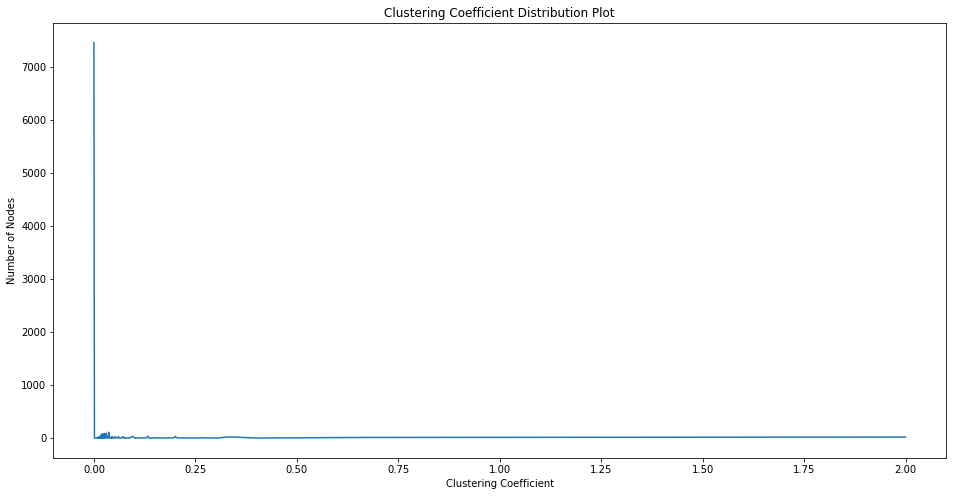

In [14]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=clusterCoefGrouping[0], y=clusterCoefGrouping[1])
plt.ylabel('Number of Nodes')
plt.xlabel('Clustering Coefficient')
plt.title("Clustering Coefficient Distribution Plot")
plt.show()

# Question 2 - [35 points] PageRank, Hubs and Authority

For the dataset chosen in the above question, calculate the following: <br>

1. [15 points] PageRank score for each node
2. [15 points] Authority and Hub score for each node

[5 points] Compare the results obtained from both the algorithms in parts 1 and 2 based on the node
scores. <br> <br>
**HINT:** Note that PageRank computes a ranking of nodes in the graph based on the structure of the incoming links. On the other hand, the HITS algorithm computes the authority score for a node based on the incoming links and computes the hub score based on outgoing links. <br> <br>
**NOTE:** You CAN use libraries like networkx to solve this question. You are allowed to subsample the dataset in case it is not processable on your machine. Ensure that you use an approach like random walk to subsample the nodes so that you get a connected network.

In [15]:
ng = networkx.from_numpy_matrix(np.array(graph), create_using=networkx.DiGraph)

#### Page Rank:

In [16]:
# Create a graph such that edge weights sum to 1.
sng = networkx.stochastic_graph(ng.to_directed(), weight='weight')

In [17]:
# Number of nodes.
V = sng.number_of_nodes()
# Initial rankings.
rankings = {}
for i in range(V):
    rankings[i] = 1.0/V

In [18]:
zeroDegreeNodes = [n for n in sng if sng.out_degree(n, weight='weight') == 0.0]

In [19]:
# Iteratively update the rankings based on outward edges.
for i in range(100):
    prevRank = rankings
    # New ranking will be updated based on previous ranking.
    rankings = {}
    for i in range(V):
        rankings[i] = 0
        
    # zero degree random jumps.
    s = 0.9 * sum(prevRank[i] for i in zeroDegreeNodes)
    
    for node in sng:
        # For all neighbours of this node the ranking will be affected.
        for neighbour in sng[node]:
            rankings[neighbour] += 0.9 * prevRank[node] * sng[node][neighbour]['weight']
            
        # including damping, but since graph is undirected, other terms end up being 0.
        rankings[node] += s * 1.0/V + 0.1 * 1.0/V

In [20]:
rankings

{0: 9.617439790330437e-05,
 1: 0.00010545207824990805,
 2: 0.00017378528863140649,
 3: 0.00019063836871226469,
 4: 0.00011543697763547893,
 5: 0.00017203704006481151,
 6: 0.00017662854531124054,
 7: 0.00026098317144154076,
 8: 0.00015322907812534965,
 9: 9.697139331017873e-05,
 10: 0.00013658988309320742,
 11: 0.00010946414730175819,
 12: 0.00012113961952538986,
 13: 0.0005981708119621614,
 14: 7.813524525421799e-05,
 15: 0.00015891343977471851,
 16: 8.97051291226275e-05,
 17: 0.00018922361922681276,
 18: 0.00012592879967584548,
 19: 0.00017341840481472728,
 20: 0.00031879934823187095,
 21: 0.00023332395335323085,
 22: 0.00013959458592510584,
 23: 0.0001219893657861578,
 24: 0.00010105223903147804,
 25: 0.00011074362864587714,
 26: 0.00025934048363090474,
 27: 0.00026714280071182486,
 28: 9.310813045598844e-05,
 29: 8.224293058957033e-05,
 30: 0.00011695532602022047,
 31: 0.0009147240494074295,
 32: 0.000210779862321987,
 33: 8.725365960603857e-05,
 34: 0.00022871759248516626,
 35: 0.0

In [22]:
networkx.pagerank(sng)

{0: 9.729759192800973e-05,
 1: 0.00010645852574085076,
 2: 0.00017344150766923007,
 3: 0.0001861102762683309,
 4: 0.00011543274372269603,
 5: 0.0001688119713898678,
 6: 0.00017365590324676836,
 7: 0.00024995694053395905,
 8: 0.000149745740864701,
 9: 9.816143026632219e-05,
 10: 0.00013548568135817688,
 11: 0.00011011302951114542,
 12: 0.00012093254771727308,
 13: 0.0005683179147866599,
 14: 8.038377660834132e-05,
 15: 0.00015083276280343575,
 16: 9.140611598336027e-05,
 17: 0.00018158753243589603,
 18: 0.0001248931184284091,
 19: 0.0001697089161551292,
 20: 0.0003021376171262265,
 21: 0.0002278099087060193,
 22: 0.00013838355655462103,
 23: 0.00012210284098672656,
 24: 0.00010223855857062022,
 25: 0.00011111979981263277,
 26: 0.0002466391744688287,
 27: 0.00025740700643802456,
 28: 9.452040719121217e-05,
 29: 8.416013404720123e-05,
 30: 0.00011584557338653057,
 31: 0.000855246257218826,
 32: 0.0002001639394369275,
 33: 8.782353965170816e-05,
 34: 0.0002248139860962476,
 35: 0.000396182

#### HITS Algorithm:

In [23]:
ng = networkx.from_numpy_matrix(np.array(graph), create_using=networkx.DiGraph)

In [24]:
hubs,authority = networkx.hits(ng)

/opt/homebrew/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [25]:
hubs

{0: 1.9148143024239042e-05,
 1: -0.0,
 2: -0.0,
 3: -0.0,
 4: -0.0,
 5: -0.0,
 6: 1.4249580703509423e-05,
 7: -0.0,
 8: 7.071633035212976e-05,
 9: 2.192762409367164e-06,
 10: 0.003422972141540502,
 11: 9.052170379665892e-06,
 12: 4.722813962920426e-06,
 13: -0.0,
 14: 2.49761364547539e-05,
 15: -0.0,
 16: -0.0,
 17: 3.4800902945711557e-06,
 18: -0.0,
 19: -0.0,
 20: 9.218602765302197e-06,
 21: -0.0,
 22: 0.0009680796101730878,
 23: 5.874664502943815e-06,
 24: -0.0,
 25: 0.00025024281921783714,
 26: 0.00821136162944627,
 27: 4.703678951087826e-05,
 28: 0.0009179508710973822,
 29: -0.0,
 30: -0.0,
 31: 0.006983987222628401,
 32: 1.7471423011152923e-05,
 33: -0.0,
 34: 7.681990148177135e-06,
 35: 2.510771213574231e-07,
 36: -0.0,
 37: 2.682886838938287e-06,
 38: -0.0,
 39: 4.28023748648221e-06,
 40: -0.0,
 41: -0.0,
 42: -0.0,
 43: 4.880968298950336e-06,
 44: 4.073572639011201e-06,
 45: -0.0,
 46: 0.00485106740303634,
 47: -0.0,
 48: -0.0,
 49: -0.0,
 50: -0.0,
 51: 3.064224940454331e-06,

In [26]:
authority

{0: 1.9071296809475273e-05,
 1: 3.0207276600588668e-06,
 2: 3.5014010359432433e-06,
 3: 1.1406271190186507e-05,
 4: 0.0005840220411627749,
 5: 3.3014384370731925e-05,
 6: 1.0708377820827042e-05,
 7: 3.104964031409858e-05,
 8: 1.0331313465897756e-05,
 9: 2.7530555233722164e-06,
 10: 8.305905662362953e-06,
 11: 0.00012934919254528265,
 12: 4.601968929177685e-05,
 13: 7.415494259694753e-05,
 14: 8.834381463297293e-07,
 15: 2.4293645974527507e-06,
 16: 1.1150160380195553e-06,
 17: 5.90926800302817e-06,
 18: 5.405874842800082e-06,
 19: 8.958191308463149e-05,
 20: 2.4637300309287855e-05,
 21: 7.98920048801573e-05,
 22: 2.46244502260061e-06,
 23: 0.00012205129242541792,
 24: 0.00013745992761214702,
 25: 9.668349090519237e-05,
 26: 0.00010640899522198427,
 27: 0.00014604096368390083,
 28: 9.597809320519182e-05,
 29: 9.447882888197257e-05,
 30: 0.00012310186117392972,
 31: 0.0343725546064221,
 32: 0.00038230418323177733,
 33: 1.7051072738740298e-06,
 34: 1.239430964052742e-05,
 35: 2.3656197994

#### Comparing Scores:

In [27]:
dict(sorted(rankings.items(), key=lambda x: x[1], reverse=True))

{556: 0.000986850232258955,
 841: 0.0009295848979023279,
 300: 0.0009259964939970026,
 558: 0.0009250900992268646,
 176: 0.000921247404177589,
 353: 0.0009196397499644908,
 31: 0.0009147240494074295,
 174: 0.0009076616343651193,
 299: 0.0008917078158105374,
 356: 0.0008882841056913805,
 99: 0.0008880040567627636,
 170: 0.0008737183929764884,
 173: 0.0008455924897558928,
 294: 0.0008371329964081184,
 296: 0.0008323233984653443,
 246: 0.0008261223638359295,
 293: 0.0008193829748479734,
 636: 0.0008093470478378843,
 637: 0.0008061423881119598,
 291: 0.0008017711002433939,
 297: 0.0008013428845496771,
 67: 0.0007840522114786656,
 172: 0.0007743322658149448,
 354: 0.0007727618663349614,
 350: 0.0007724866966925146,
 565: 0.0007708990744981586,
 563: 0.000755119825608318,
 351: 0.0007445121046845907,
 461: 0.0007409159925875266,
 357: 0.0007317770534174758,
 635: 0.0007170022858379651,
 878: 0.0007061030784080464,
 557: 0.0007010611005697339,
 638: 0.0006961005225790954,
 1059: 0.00069177071

In [28]:
dict(sorted(hubs.items(), key=lambda x: x[1], reverse=True))

{1091: 0.00837623442453916,
 5891: 0.00837623442453916,
 164: 0.00823459150696687,
 3649: 0.00823459150696687,
 8680: 0.00823459150696687,
 26: 0.00821136162944627,
 804: 0.00821136162944627,
 2746: 0.00821136162944627,
 3672: 0.00821136162944627,
 5285: 0.00821136162944627,
 6078: 0.00821136162944627,
 2897: 0.007733324277478949,
 5300: 0.007673596231228804,
 5544: 0.007673089676520104,
 5269: 0.007611110517848714,
 1424: 0.007606963010548111,
 2314: 0.007591194085089137,
 4853: 0.007538514887166283,
 3744: 0.007507774356852542,
 564: 0.0073798764422488144,
 6019: 0.007366565160606415,
 468: 0.007329884878461604,
 2784: 0.007288151201118889,
 724: 0.007249446039774835,
 298: 0.007249421438563244,
 4567: 0.007123139269153511,
 4350: 0.007050127890435731,
 31: 0.006983987222628401,
 172: 0.006933560137696224,
 273: 0.006862515129976947,
 3823: 0.006850302550862502,
 7533: 0.006669509906764011,
 3976: 0.006664230834376616,
 1450: 0.0065909648628199235,
 6256: 0.006567514351866041,
 168: 

In [29]:
dict(sorted(authority.items(), key=lambda x: x[1], reverse=True))

{176: 0.037135751875731,
 558: 0.03438032340464443,
 31: 0.0343725546064221,
 556: 0.033728212168099174,
 173: 0.03250728797439978,
 170: 0.03127773597664516,
 2762: 0.02804941423076625,
 175: 0.026384470884724304,
 557: 0.024198178767640566,
 1059: 0.023351251615961813,
 172: 0.018760532133250716,
 169: 0.018187159268570813,
 356: 0.016220841990570042,
 174: 0.01565376229156427,
 355: 0.01457100452238426,
 99: 0.01451195840208352,
 350: 0.014360033988445474,
 353: 0.013919365625696782,
 354: 0.01343374278022426,
 171: 0.012536947802983492,
 293: 0.011923580234454492,
 299: 0.01157916849849311,
 291: 0.01097418589660458,
 297: 0.010255389116854086,
 294: 0.010250428249874405,
 352: 0.010161910899863992,
 296: 0.010145039497238403,
 300: 0.010143426151212295,
 357: 0.00985854287479566,
 461: 0.00936120310254818,
 351: 0.00861424610714884,
 565: 0.007129853346316523,
 246: 0.007122101983325415,
 292: 0.006927602409962675,
 566: 0.006807077539882686,
 298: 0.0062596390086635464,
 563: 0.0

#### There is some commanlity between results returned by PageRank and Authority as both use incoming edges. Hubs return a different result as what they use is different.

- Example -> Nodes numbered - 556, 558, 176 etc are returned in authority top 10 and page ranking top 10.
- PageRank shows that the node 556 is most important., let's see why:

In [39]:
sng.out_edges(556)

OutEdgeDataView([(556, 99), (556, 174), (556, 296), (556, 341), (556, 352), (556, 354), (556, 624), (556, 1249), (556, 1357), (556, 3111)])

In [38]:
sng.in_edges(556)

InEdgeDataView([(10, 556), (26, 556), (31, 556), (46, 556), (74, 556), (164, 556), (172, 556), (273, 556), (298, 556), (454, 556), (468, 556), (555, 556), (564, 556), (724, 556), (785, 556), (804, 556), (1091, 556), (1374, 556), (1424, 556), (1450, 556), (1824, 556), (1943, 556), (2067, 556), (2089, 556), (2314, 556), (2584, 556), (2693, 556), (2746, 556), (2784, 556), (2897, 556), (3388, 556), (3649, 556), (3672, 556), (3744, 556), (3762, 556), (3823, 556), (3857, 556), (3976, 556), (4285, 556), (4319, 556), (4350, 556), (4567, 556), (4853, 556), (4986, 556), (5107, 556), (5269, 556), (5285, 556), (5291, 556), (5300, 556), (5351, 556), (5544, 556), (5752, 556), (5891, 556), (6078, 556), (6478, 556), (6830, 556), (7533, 556), (8282, 556), (8366, 556), (8680, 556)])

#### We can see why pageRank says 556 is a very important node. - A lot of incoming edges and a lot of outgoing edges. A lot of other important nodes point to this node like 172.

In [40]:
sng.out_edges(841)

OutEdgeDataView([(841, 2446), (841, 3010), (841, 3628), (841, 3837), (841, 3838), (841, 3839), (841, 3840)])

In [41]:
sng.in_edges(841)

InEdgeDataView([(136, 841), (174, 841), (396, 841), (458, 841), (661, 841), (697, 841), (764, 841), (837, 841), (1187, 841), (1291, 841), (1526, 841), (1639, 841), (1913, 841), (2679, 841), (2830, 841), (2894, 841), (3076, 841), (3428, 841), (3760, 841), (3825, 841), (4008, 841), (4208, 841), (4235, 841), (4362, 841), (4538, 841), (4827, 841), (5126, 841), (5386, 841), (5934, 841), (6137, 841), (6199, 841), (6901, 841), (7537, 841), (7977, 841), (7979, 841)])

#### A higher authority weight occurs if the page is pointed to by pages with high hub weights.  All incoming edges from node x must have a high hub scores for node 176 as it has highest authority value.

In [43]:
ng.in_edges(176)

InEdgeDataView([(26, 176), (31, 176), (46, 176), (164, 176), (168, 176), (172, 176), (273, 176), (298, 176), (468, 176), (555, 176), (564, 176), (672, 176), (724, 176), (804, 176), (1091, 176), (1119, 176), (1374, 176), (1424, 176), (1450, 176), (1578, 176), (1824, 176), (2089, 176), (2314, 176), (2584, 176), (2601, 176), (2638, 176), (2665, 176), (2693, 176), (2746, 176), (2784, 176), (2897, 176), (3181, 176), (3649, 176), (3672, 176), (3744, 176), (3823, 176), (3841, 176), (3976, 176), (4350, 176), (4567, 176), (4568, 176), (4596, 176), (4686, 176), (4853, 176), (5269, 176), (5285, 176), (5300, 176), (5544, 176), (5891, 176), (6019, 176), (6078, 176), (6256, 176), (6289, 176), (6472, 176), (6478, 176), (6844, 176), (7504, 176), (7533, 176), (7774, 176), (7940, 176), (8366, 176), (8680, 176)])

In [48]:
# Printing hub scores.
for x,y in ng.in_edges(176):
    print(hubs[x])

0.00821136162944627
0.006983987222628401
0.00485106740303634
0.00823459150696687
0.006277801689645995
0.006933560137696224
0.006862515129976947
0.007249421438563244
0.007329884878461604
0.006167221233296234
0.0073798764422488144
0.0010452342287108369
0.007249446039774835
0.00821136162944627
0.00837623442453916
0.0057550341623039914
0.004491794382518339
0.007606963010548111
0.0065909648628199235
0.003969703102481234
0.004699405093537905
0.005449369742725273
0.007591194085089137
0.0057265456945245485
0.0041128291096942955
0.0019402641016553774
0.001087647109983641
0.00619327253487275
0.00821136162944627
0.007288151201118889
0.007733324277478949
0.00486587265878077
0.00823459150696687
0.00821136162944627
0.007507774356852542
0.006850302550862502
0.004688068189760196
0.006664230834376616
0.007050127890435731
0.007123139269153511
0.00441573632112095
0.004398103415017894
0.004521006513316467
0.007538514887166283
0.007611110517848714
0.00821136162944627
0.007673596231228804
0.0076730896765201

#### A higher hub weight occurs if the page points to many pages with high authority weights. All outgoing edges from node 1091 must have a authority scores as it has highest hubs value.

In [49]:
ng.out_edges(1091)

OutEdgeDataView([(1091, 31), (1091, 170), (1091, 173), (1091, 175), (1091, 176), (1091, 556), (1091, 557), (1091, 558), (1091, 1059), (1091, 2762)])

In [50]:
for x,y in ng.out_edges(1091):
    print(authority[y])

0.0343725546064221
0.03127773597664516
0.03250728797439978
0.026384470884724304
0.037135751875731
0.033728212168099174
0.024198178767640566
0.03438032340464443
0.023351251615961813
0.02804941423076625
